In [49]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ridge_regression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
data= pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
print('Shape of the data set:', data.shape)
print('Features', list(data.columns))
n_features= list(data.select_dtypes(include= 'number').columns)
c_features= list(data.select_dtypes(exclude= 'number').columns)
print('Numerical features', n_features)
print('Categorical features', c_features)

Shape of the data set: (1338, 7)
Features ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
Numerical features ['age', 'bmi', 'children', 'charges']
Categorical features ['sex', 'smoker', 'region']


In [4]:
target= data['charges']
n_data= data[n_features].drop(['charges'], axis= 1)
c_data= data[c_features]

In [5]:
n_data.head()

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0


In [6]:
unique_children= n_data['children'].unique()
print('Unique number of childrens', unique_children)
unique_region= c_data['region'].unique()
print('Unique regions', unique_region)

Unique number of childrens [0 1 3 2 5 4]
Unique regions ['southwest' 'southeast' 'northwest' 'northeast']


In [7]:
c_data.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [18]:
n_data.describe()

,age,bmi,children
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918
std,14.049960,6.098187,1.205493
min,18.000000,15.960000,0.000000
25%,27.000000,26.296250,0.000000
50%,39.000000,30.400000,1.000000
75%,51.000000,34.693750,2.000000
max,64.000000,53.130000,5.000000


C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


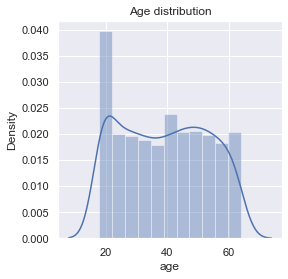

In [14]:
sns.set()
plt.figure(figsize= (4, 4))
sns.distplot(data['age'])
plt.title('Age distribution')
plt.show()

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'BMI distribution')

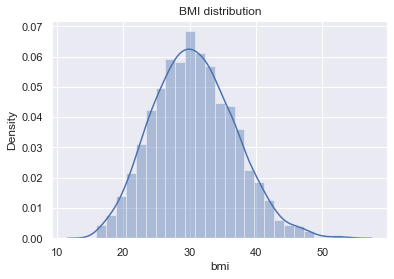

In [17]:
sns.distplot(data['bmi'])
plt.title('BMI distribution')

no     1064
yes     274
Name: smoker, dtype: int64


<AxesSubplot:>

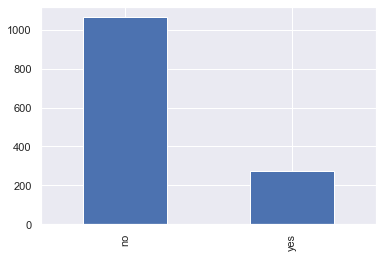

In [20]:
print(data['smoker'].value_counts())
data['smoker'].value_counts().plot.bar()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


<AxesSubplot:>

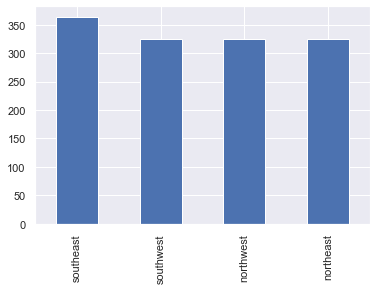

In [22]:
print(c_data['region'].value_counts())
c_data['region'].value_counts().plot(kind= 'bar')

male      676
female    662
Name: sex, dtype: int64


<AxesSubplot:>

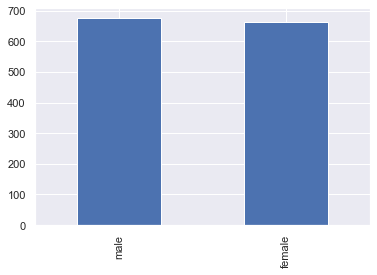

In [23]:
print(c_data['sex'].value_counts())
c_data['sex'].value_counts().plot(kind= 'bar')

<AxesSubplot:xlabel='children', ylabel='count'>

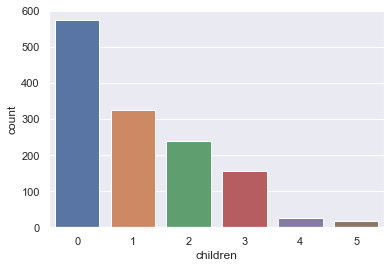

In [27]:
sns.countplot(x= 'children', data= n_data)

Encoding categorical features

In [32]:
data.replace({'sex':{'male': 0, 'female': 1}}, inplace= True)

In [35]:
data.replace({'smoker': {'yes': 1, 'no': 0}}, inplace= True)

In [41]:
data1= pd.concat([data, pd.get_dummies(data['region'], drop_first= True)], axis= 1).drop(['region'], axis= 1)
data1.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,1,27.900,0,1,16884.92400,0,0,1
1,18,0,33.770,1,0,1725.55230,0,1,0
2,28,0,33.000,3,0,4449.46200,0,1,0
3,33,0,22.705,0,0,21984.47061,1,0,0
4,32,0,28.880,0,0,3866.85520,1,0,0


In [47]:
data1.drop(['charges'], axis= 1, inplace= True)

In [48]:
X_train, X_test, y_train, y_test= train_test_split(data1, target)

In [51]:
linear= LinearRegression()
tree= DecisionTreeRegressor()
svr= SVR()
models= [linear, tree, svr]

In [58]:
from sklearn.preprocessing import StandardScaler
scaler_X= StandardScaler()
scaler_y= StandardScaler()

In [62]:
from sklearn.metrics import r2_score

In [60]:
X_train_sc= scaler_X.fit_transform(X_train)
X_test_sc= scaler_X.transform(X_test)

In [63]:
def model_training(X, y, model):
    
    model.fit(X, y)
    y_predicted= model.predict(X)
    return r2_score(y, y_predicted)

In [64]:
for model in models:
    training_loss= model_training(X_train_sc, y_train, model)
    print(f'For {model} training error is: {training_loss}')

For LinearRegression() training error is: 0.7546807361374619
For DecisionTreeRegressor() training error is: 1.0
For SVR() training error is: -0.10053863472113123
